# Creating and analysing the simulated datasets #
Current code includes: 
Number of transcripts: each transcript has its own SNPs, each with their own error rate, and its own mobility status.

Number of SNPs: the number of SNPs per transcript (currently fixed).

Number of replicates: We create 2 homograft files (Nhom1 and Nhom2), and then no_reps heterograft files. 

# Method A #

If a single SNP has a read depth >= min_read_thresh, then it is flagged as being mobile. If 1 or more SNPs are flagged as being mobile, then the transcript is flagged as being mobile.

# Handling SNPs #

Bayes Factors: sum them all (should we point out in the paper that this is a useful advantage of this method?)

Method A: snp_thresh SNPs need to have reads mapping to the other ecotype, in order for a mobile classification to be given for the transcript

Method B: snp_thres SNPs need to have reads mapping to the other ecotype, in order for a mobile classification to be given for the transcript

# Handling replicates #

Bayes Factors: Again, very simple. We sum across replicates

Method A: A transcript needs to have been given a mobile assignment in rep_thresh replicates, in order for a final mobile assignment to be given.

Method B: A transcript needs to have been given a mobile assignment in rep_thresh replicates, in order for a final mobiel assigment to be given.

/Users/tomkinsm/baymobil/Figure4/N
Running Bayes...
Finished!


/Users/tomkinsm/baymobil/baymobil/simulations.py:152: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby([func_parameter,"transcript"]).sum().reset_index()


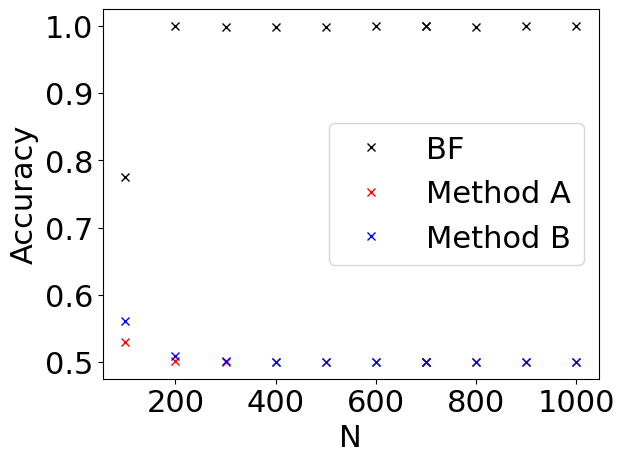

/Users/tomkinsm/baymobil/Figure4/fixedNhom
Running Bayes...
Finished!


/Users/tomkinsm/baymobil/baymobil/simulations.py:152: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby([func_parameter,"transcript"]).sum().reset_index()


AttributeError: module 'baymobil.plot_data' has no attribute 'plot_data'

In [266]:
## Code to run the simulations for Figure 4: takes 75 minutes to run
import baymobil as baymob

## Run the code in the folder for Figure 4
%cd   "/Users/tomkinsm/baymobil/Figure4/N/"
## Running and evaluating the simulations
## Each simulation is designed to investigate the accuracy of the results as a function of some parameter. The values for this parameter must be defined in the "parameters.cfg" file
parameter_func = "N"
## Create the datasets. This function creates no_reps .csv files, storing them in the "output" folder. This will delete any previous files, so make sure you have moved anything that you still need.
baymob.simulations.create_simulated_data(parameter_func)
## Now, we load in and combine all of the replicate data, according to the above rules
df = baymob.plot_data.load_data()
## Plot and compare the accuracy (TP + TN) / (TP + TN + FP + FN) of the three different methods on our simulated datasets
baymob.plot_data.plot_data_all(df,parameter_func)

%cd   "/Users/tomkinsm/baymobil/Figure4/fixedNhom/"
parameter_func = "N"
baymob.simulations.create_simulated_data(parameter_func)
df = baymob.plot_data.load_data()
baymob.plot_data.plot_data_all(df, parameter_func)


In [ ]:
## Code to run the simulations for Figure 5
import baymobil as baymob
import pandas as pd

%cd   "/Users/tomkinsm/baymobil/Figure5/"
baymob.simulations.create_simulated_data("N")



In [ ]:
## Load in and process the data
## As there are two parameters being varied here (N and q), we can't use the built in plotting function

## Load in the data
df = pd.read_csv("SNP_wise_values.csv")
## Group by transcript
print(df)

df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()
print(df_transcript)

## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF>=1),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF<1),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF>=1),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF<1),"FN"] = 1

print(df_transcript)

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()

print(final_results)

In [ ]:
## Plot the pie-chart plots
## Create the figures separately and then add in the axes later

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_pie(x, ax):

    tp = float(x["TP"])
    tn = float(x["TN"]) 
    fp = float(x["FP"]) 
    fn = float(x["FN"]) 

    total = tp + tn + fp + fn
    
    tp = tp / total
    tn = tn / total
    fp = fp / total
    fn = fn / total

    n = float(x["N"])
    q = float(x["q"])

    ax.pie([tp,tn,fp,fn], center = ([n, q]), radius = 0.05, colors=['b','g','r','y'], normalize = True)

matplotlib.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)
fig.patch.set_facecolor('white')

## Bayes factors
df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()

## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF>=1),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF<1),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF>=1),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF<1),"FN"] = 1

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()
test = final_results.copy()
test["N"] = test["N"] / test["N"].max()
test["q"] = test["q"] / test["q"].max()
test.apply(lambda x: plot_pie(x,ax), axis=1)
x_ticks = np.arange(100,1000,100)
y_ticks = np.arange(0.001,0.01,0.001)
#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
#plt.legend(['TP', 'TN','FP','FN'])
ax.axis('tight')

plt.savefig("bayes_pie.svg",dpi=300)
plt.show()


## Same plot for Method A
fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)
fig.patch.set_facecolor('white')

snp_thresh = 2
df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()
## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_A>=snp_thresh),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_A<snp_thresh),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_A>=snp_thresh),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_A<snp_thresh),"FN"] = 1

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()
test = final_results.copy()
test["N"] = test["N"] / test["N"].max()
test["q"] = test["q"] / test["q"].max()
test.apply(lambda x: plot_pie(x,ax), axis=1)
x_ticks = np.arange(100,1000,100)
y_ticks = np.arange(0.001,0.01,0.001)
#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
#plt.legend(['TP', 'TN','FP','FN'])
#ax.set_title("Method A")
ax.axis('tight')
plt.savefig("methoda_pie.svg",dpi=300)
plt.show()

## Same plot for Method B
fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)
fig.patch.set_facecolor('white')
df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()

## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_B>=snp_thresh),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_B<snp_thresh),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_B>=snp_thresh),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_B<snp_thresh),"FN"] = 1

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()

test = final_results.copy()
test["N"] = test["N"] / test["N"].max()
test["q"] = test["q"] / test["q"].max()
test.apply(lambda x: plot_pie(x,ax), axis=1)
#plt.legend(['TP', 'TN','FP','FN'])
##ax.set_title("Method B")
ax.axis('tight')
plt.savefig("methodb_pie.svg",dpi=300)
plt.show()


In [420]:
## New simulations as per Reviewer 2. Take actual RNA-Seq data and add additional mobile reads to some of the transcripts
%cd   "/Users/tomkinsm/baymobil/"

import pandas as pd
import numpy as np
import baymobil as baymob

Nhomcol = pd.read_csv("C-C-root-FN.csv")
data2 = pd.read_csv("P-P-shoot-FN.csv")
data3 = pd.read_csv("C-C-shoot-FN.csv")
Nhomped = pd.read_csv("P-P-root-FN.csv")

## Combine datasets based on their SNPs
Ntotal_full = pd.merge(Nhomcol, Nhomped, on="SNP")

## Add in filtering on similarity of homograft
Ntotal_full = Ntotal_full[(abs(Ntotal_full["N_x"] - Ntotal_full["N_y"])/Ntotal_full["N_x"] < 0.1) & (abs(Ntotal_full["N_x"] - Ntotal_full["N_y"])/Ntotal_full["N_y"] < 0.1)]

display(Ntotal_full)

## Maybe remove low values
#Nhomcol = Nhomcol[Nhomcol["N"]>200]
#Nhomped = Nhomped[Nhomped["N"]>200]

titration = 0.1

## Take a subset
Ntotal = Ntotal_full.copy()

display(Ntotal)
Ntotal["Mobile"] = 0
## Set some as being mobile
Ntotal["Mobile"].iloc[0:int(len(Ntotal)/2)] = 1
Ntotal["titration"] = Ntotal["Mobile"] * titration

Ntotal["N"] = np.ceil((1 - Ntotal["titration"]) * Ntotal["N_x"] + Ntotal["titration"] * Ntotal["N_y"])
Ntotal["n"] = np.ceil((1 - Ntotal["titration"]) * Ntotal["n_x"] + Ntotal["titration"] * (Ntotal["N_y"] - Ntotal["n_y"]))

Nhom1 = Ntotal[["SNP", "N_x","n_x"]]
Nhom2 = Ntotal[["SNP","N_y","n_y"]]
Nhom1.rename(columns={"N_x" : "N","n_x" : "n"}, inplace=True)
Nhom2.rename(columns={"N_y" : "N","n_y" : "n"}, inplace = True)

## Perform Bayesian analysis
results = baymob.run_bayes_analysis([Nhom1,Nhom2,Ntotal[["SNP","N","n","Mobile"]]])
results



/Users/tomkinsm/baymobil


,SNP,N_x,eco1_x,n_x,N_y,n_y,eco1_y
33,Chr1_46579,29.0,29.0,0.0,27.0,0.0,27.0
38,Chr1_48459,638.0,638.0,0.0,632.0,0.0,632.0
40,Chr1_52425,2.0,2.0,0.0,2.0,0.0,2.0
43,Chr1_53901,42.0,42.0,0.0,39.0,0.0,39.0
46,Chr1_63644,30.0,30.0,0.0,31.0,0.0,31.0
...,...,...,...,...,...,...,...
175673,Chr5_26949712,2.0,2.0,0.0,2.0,0.0,2.0
175681,Chr5_26951446,321.0,321.0,0.0,303.0,0.0,303.0
175682,Chr5_26951955,176.0,175.0,1.0,167.0,0.0,167.0
175707,Chr5_26967910,148.0,148.0,0.0,161.0,0.0,161.0


,SNP,N_x,eco1_x,n_x,N_y,n_y,eco1_y
33,Chr1_46579,29.0,29.0,0.0,27.0,0.0,27.0
38,Chr1_48459,638.0,638.0,0.0,632.0,0.0,632.0
40,Chr1_52425,2.0,2.0,0.0,2.0,0.0,2.0
43,Chr1_53901,42.0,42.0,0.0,39.0,0.0,39.0
46,Chr1_63644,30.0,30.0,0.0,31.0,0.0,31.0
...,...,...,...,...,...,...,...
175673,Chr5_26949712,2.0,2.0,0.0,2.0,0.0,2.0
175681,Chr5_26951446,321.0,321.0,0.0,303.0,0.0,303.0
175682,Chr5_26951955,176.0,175.0,1.0,167.0,0.0,167.0
175707,Chr5_26967910,148.0,148.0,0.0,161.0,0.0,161.0


/var/folders/t5/q1tt12hd2sg29kw894zcfbtm000b_5/T/ipykernel_3193/504152517.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ntotal["Mobile"].iloc[0:int(len(Ntotal)/2)] = 1
/var/folders/t5/q1tt12hd2sg29kw894zcfbtm000b_5/T/ipykernel_3193/504152517.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nhom1.rename(columns={"N_x" : "N","n_x" : "n"}, inplace=True)
/var/folders/t5/q1tt12hd2sg29kw894zcfbtm000b_5/T/ipykernel_3193/504152517.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,SNP,N,n,Mobile,Nhomo1,nhomo1,Nhomo2,nhomo2,nmax,meanN2,N2max,log10BF
0,Chr1_46579,29.0,3.0,1,29.0,0.0,27.0,0.0,10,1.937182,3,0.323667
1,Chr1_48459,638.0,64.0,1,638.0,0.0,632.0,0.0,10,63.169135,64,10.000000
2,Chr1_52425,2.0,1.0,1,2.0,0.0,2.0,0.0,10,0.719298,1,0.017729
3,Chr1_53901,42.0,4.0,1,42.0,0.0,39.0,0.0,10,2.769191,4,0.536476
4,Chr1_63644,31.0,4.0,1,30.0,0.0,31.0,0.0,10,2.780933,4,0.522398
...,...,...,...,...,...,...,...,...,...,...,...,...
12005,Chr5_26949712,2.0,0.0,0,2.0,0.0,2.0,0.0,10,0.220630,1,-0.806180
12006,Chr5_26951446,321.0,0.0,0,321.0,0.0,303.0,0.0,10,0.001654,1,-2.000000
12007,Chr5_26951955,176.0,1.0,0,176.0,1.0,167.0,0.0,10,0.338436,1,-0.299798
12008,Chr5_26967910,148.0,0.0,0,148.0,0.0,161.0,0.0,10,0.003119,1,-2.000000


In [374]:
## Calculate TP, TN, FP, FN
results["TP"] = 0
results["TN"] = 0
results["FP"] = 0
results["FN"] = 0

results.loc[(results.Mobile > 0) & (results.log10BF>=1),"TP"] = 1
results.loc[(results.Mobile == 0) & (results.log10BF<1),"TN"] = 1
results.loc[(results.Mobile == 0) & (results.log10BF>=1),"FP"] = 1
results.loc[(results.Mobile > 0) & (results.log10BF<1),"FN"] = 1

print(results[["TP","TN","FP","FN"]].sum())
results[(results.Mobile == 1) & (results.log10BF<1)]


TP    2311
TN    6005
FP       0
FN    3694
dtype: int64


,SNP,N,n,Mobile,Nhomo1,nhomo1,Nhomo2,nhomo2,nmax,meanN2,N2max,log10BF,bin,TP,TN,FP,FN
0,Chr1_46579,29.0,3.0,1,29.0,0.0,27.0,0.0,10,1.937182,3,0.323667,"(16.0, 31.0]",0,0,0,1
2,Chr1_52425,2.0,1.0,1,2.0,0.0,2.0,0.0,10,0.719298,1,0.017729,"(0.999, 2.0]",0,0,0,1
3,Chr1_53901,42.0,4.0,1,42.0,0.0,39.0,0.0,10,2.769191,4,0.536476,"(31.0, 52.0]",0,0,0,1
4,Chr1_63644,31.0,4.0,1,30.0,0.0,31.0,0.0,10,2.780933,4,0.522398,"(16.0, 31.0]",0,0,0,1
5,Chr1_63645,32.0,4.0,1,32.0,0.0,31.0,0.0,10,2.809835,4,0.548149,"(31.0, 52.0]",0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5990,Chr3_8229592,1.0,1.0,1,1.0,0.0,1.0,0.0,10,0.500000,1,0.000000,"(0.999, 2.0]",0,0,0,1
5992,Chr3_8281851,15.0,2.0,1,15.0,0.0,15.0,0.0,10,1.234670,2,0.141711,"(5.0, 16.0]",0,0,0,1
5993,Chr3_8314068,7.0,1.0,1,7.0,0.0,7.0,0.0,10,0.662003,1,0.003170,"(5.0, 16.0]",0,0,0,1
5994,Chr3_8319233,1.0,1.0,1,1.0,0.0,1.0,0.0,10,0.500000,1,0.000000,"(0.999, 2.0]",0,0,0,1


In [414]:
## Run Method A and Method B analysis - see what the results look like
## Method A
## Evaluate each outcome
results["Method_A"] = results["n"]
results.loc[results.Method_A>0, "Method_A"] = 1

## Method B
## Universal pipeline
results["Method_B"] = results["n"]
results.loc[results.Method_B>0, "Method_B"] = 1
results.loc[(results.nhomo1>0)|(results.nhomo2>0),"Method_B"] = 0

results["TP_bf"] = 0
results["TN_bf"] = 0
results["FP_bf"] = 0
results["FN_bf"] = 0

results["TP_Method_A"] = 0
results["TN_Method_A"] = 0
results["FP_Method_A"] = 0
results["FN_Method_A"] = 0

results["TP_Method_B"] = 0
results["TN_Method_B"] = 0
results["FP_Method_B"] = 0
results["FN_Method_B"] = 0
no_reps =1 
## Bayes factor: summed across replicates

results.loc[(results.Mobile > 0) & (results.log10BF>=1),"TP_bf"] = 1
results.loc[(results.Mobile == 0) & (results.log10BF<1),"TN_bf"] = 1
results.loc[(results.Mobile == 0) & (results.log10BF>=1),"FP_bf"] = 1
results.loc[(results.Mobile > 0) & (results.log10BF<1),"FN_bf"] = 1

## Define how many replicates need to be positive (default = all)

results.loc[(results.Mobile > 0) & (results.Method_A==no_reps),"TP_Method_A"] = 1
results.loc[(results.Mobile == 0) & (results.Method_A<no_reps),"TN_Method_A"] = 1
results.loc[(results.Mobile == 0) & (results.Method_A==no_reps),"FP_Method_A"] = 1
results.loc[(results.Mobile > 0) & (results.Method_A<no_reps),"FN_Method_A"] = 1

results.loc[(results.Mobile > 0) & (results.Method_B == no_reps),"TP_Method_B"] = 1
results.loc[(results.Mobile == 0) & (results.Method_B<no_reps),"TN_Method_B"] = 1
results.loc[(results.Mobile == 0) & (results.Method_B == no_reps),"FP_Method_B"] = 1
results.loc[(results.Mobile > 0) & (results.Method_B<no_reps),"FN_Method_B"] = 1

results[["TP_bf","TN_bf","FP_bf","FN_bf","TP_Method_A","TN_Method_A","FP_Method_A","FN_Method_A","TP_Method_B","TN_Method_B","FP_Method_B","FN_Method_B"]].sum()


TP_bf          2197
TN_bf          5893
FP_bf             0
FN_bf          3694
TP_Method_A    5881
TN_Method_A    5711
FP_Method_A     182
FN_Method_A      10
TP_Method_B    5414
TN_Method_B    5893
FP_Method_B       0
FN_Method_B     477
dtype: int64

In [321]:
## Plot the pie-chart plots
## Create the figures separately and then add in the axes later

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_pie(x, ax):

    tp = float(x["TP"])
    tn = float(x["TN"]) 
    fp = float(x["FP"]) 
    fn = float(x["FN"]) 

    total = tp + tn + fp + fn
    
    tp = tp / total
    tn = tn / total
    fp = fp / total
    fn = fn / total

    n = float(x["N"])
    q = float(x["q"])

    ax.pie([tp,tn,fp,fn], center = ([n, q]), radius = 0.05, colors=['b','g','r','y'], normalize = True)

matplotlib.rcParams.update({'font.size': 22})
#fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)
#fig.patch.set_facecolor('white')
N_old = 0
q_old = 0
test_list = []
size_list = []
N_list = [100,200,300,400,500,600,700,800,900,1000]
q_list = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009, 0.01]
for N in N_list:
    for q in q_list:
        ## Bayes factors
        df_transcript = results.copy()
        df_transcript = df_transcript[(df_transcript["N"]>N_old) & (df_transcript["N"]<=N) & (df_transcript["q"]>q_old) & (df_transcript["q"]<=q)]
        print(len(df_transcript))
        size_list.append(len(df_transcript))
        ## Calculate TP, TN, FP, FN
        df_transcript["TP"] = 0
        df_transcript["TN"] = 0
        df_transcript["FP"] = 0
        df_transcript["FN"] = 0

        df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF>=1),"TP"] = 1
        df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF<1),"TN"] = 1
        df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.log10BF>=1),"FP"] = 1
        df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.log10BF<1),"FN"] = 1

        #final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()
        #test = final_results.copy()
        #test["N"] = test["N"] / test["N"].max()
        #test["q"] = test["q"] / test["q"].max()
        test_list.append(df_transcript)
        q_old = q
    N_old = N
        #test.apply(lambda x: plot_pie(x,ax), axis=1)
#x_ticks = np.arange(100,1000,100)
#y_ticks = np.arange(0.001,0.01,0.001)
#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
#plt.legend(['TP', 'TN','FP','FN'])
#ax.axis('tight')

#plt.savefig("bayes_pie.svg",dpi=300)
#plt.show()

KeyError: 'q'

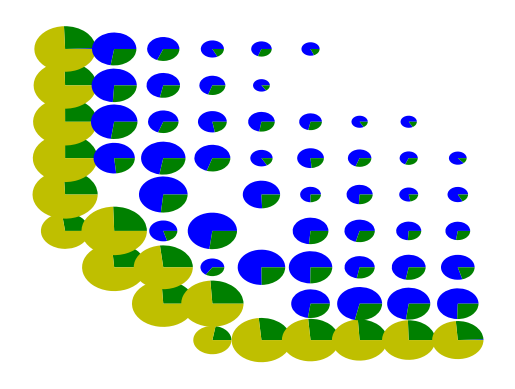

In [275]:
nq_list = []
for N in range(len(N_list)):
    for q in range(len(q_list)):
        nq_list.append([N,q])

for i in range(len(test_list)):
    n,q = nq_list[i]
    x = test_list[i]
    if len(x) > 10:
        tp = float(x["TP"].sum())
        tn = float(x["TN"].sum())
        fp = float(x["FP"].sum())
        fn = float(x["FN"].sum())
        total = tp + tn + fp + fn

        tp = tp / total
        tn = tn / total
        fp = fp / total
        fn = fn / total
        #print(np.log(size_list[i]))
        plt.pie([tp,tn,fp,fn], center = ([n, q]), radius = np.log(size_list[i])/15, colors=['b','g','r','y'], normalize = True)
plt.axis('tight')
matplotlib.rcParams.update({'font.size': 22})
plt.savefig("pie_real_data.svg", dpi=300)

11784


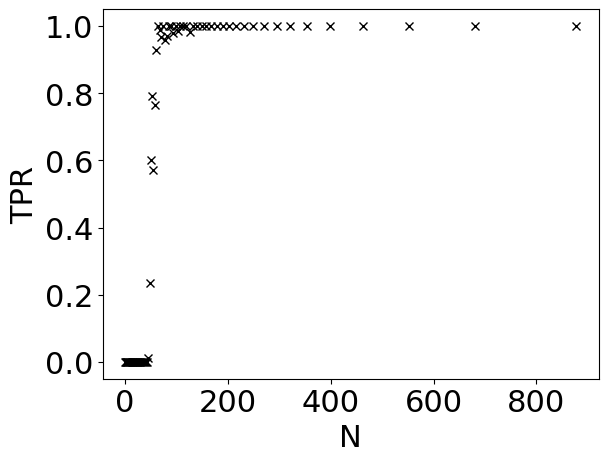

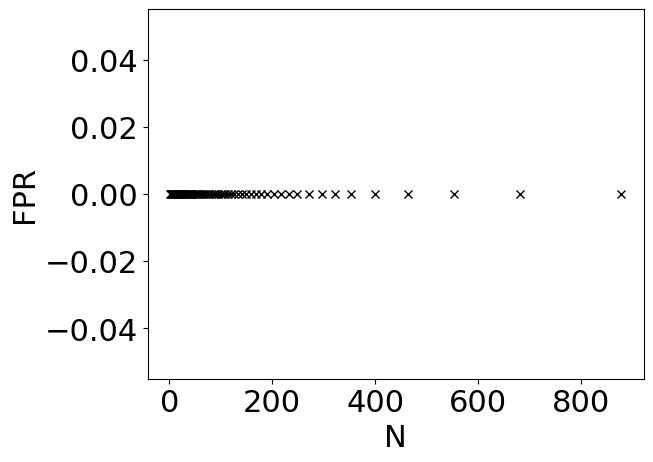

In [398]:
## Create the plots
maxN = results.N.max()
minN = results.N.min()

## Take a copy of the output file

sim_results = results.copy()

sim_results = sim_results[sim_results["N"]<1000]
print(len(sim_results))

sim_results["bin"] = pd.qcut(sim_results["N"], q = 100, duplicates = "drop")
bins = set(sim_results["bin"].to_list())
mid_list = []
tpr_list = []
fpr_list = []
for bin in bins:
    tp = sim_results["TP"][sim_results["bin"]==bin].sum()
    tn = sim_results["TN"][sim_results["bin"]==bin].sum()
    fp = sim_results["FP"][sim_results["bin"]==bin].sum()
    fn = sim_results["FN"][sim_results["bin"]==bin].sum()
    tpr = tp / (tp + fn)
    plt.plot(bin.mid, tpr, "kx")
    mid_list.append(bin.mid)
    tpr_list.append(tpr)

plt.xlabel("N")
plt.ylabel("TPR")
plt.savefig("TPR.png", dpi = 300)
plt.show()
for bin in bins:
    tp = sim_results["TP"][sim_results["bin"]==bin].sum()
    tn = sim_results["TN"][sim_results["bin"]==bin].sum()
    fp = sim_results["FP"][sim_results["bin"]==bin].sum()
    fn = sim_results["FN"][sim_results["bin"]==bin].sum()
    fpr = fp / (fp + tn)
    plt.plot(bin.mid, fpr, "kx")
    fpr_list.append(fpr)

plt.xlabel("N")
plt.ylabel("FPR")
plt.savefig("FPR.png", dpi= 300)
plt.show()

11784


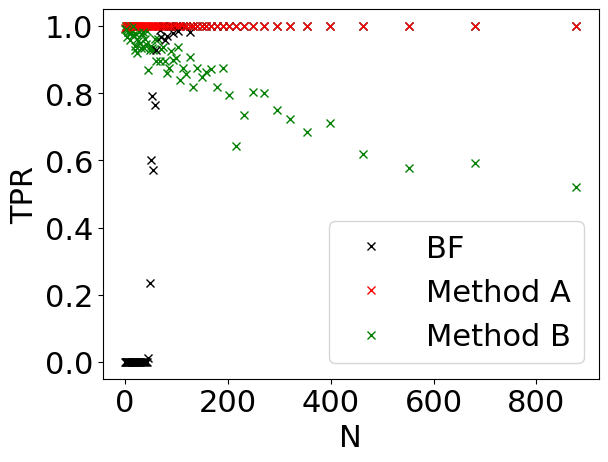

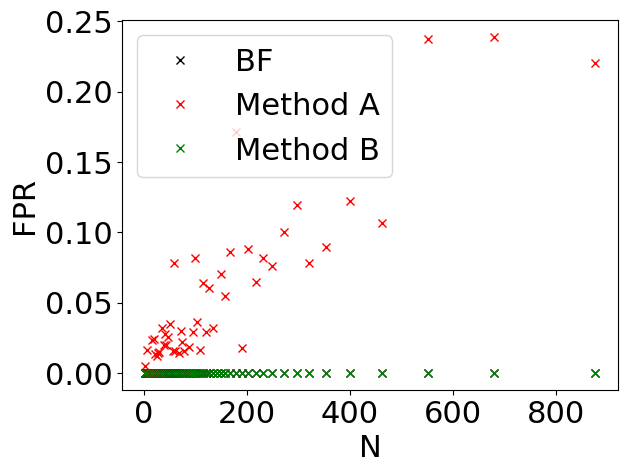

,midpoint,TPR_bf,FPR_bf,TPR_A,FPR_A,TPR_B,FPR_B
0,26.5,0.000000,0.0,1.0,0.000000,0.956522,0.0
1,56.0,0.571429,0.0,1.0,0.015873,0.928571,0.0
2,18.0,0.000000,0.0,1.0,0.000000,1.000000,0.0
3,297.0,1.000000,0.0,1.0,0.119403,0.750000,0.0
4,7.5,0.000000,0.0,1.0,0.000000,0.980769,0.0
...,...,...,...,...,...,...,...
68,74.5,1.000000,0.0,1.0,0.021739,0.937500,0.0
69,104.0,0.984127,0.0,1.0,0.036364,0.936508,0.0
70,149.5,1.000000,0.0,1.0,0.070175,0.847826,0.0
71,158.0,1.000000,0.0,1.0,0.054545,0.863636,0.0


In [423]:
## Run Method A and Method B analysis - see what the results look like
## Method A
## Evaluate each outcome
sim_results = results.copy()

sim_results["Method_A"] = sim_results["n"]
sim_results.loc[sim_results.Method_A>0, "Method_A"] = 1

## Method B
## Universal pipeline
sim_results["Method_B"] = sim_results["n"]
sim_results.loc[sim_results.Method_B>0, "Method_B"] = 1
sim_results.loc[(sim_results.nhomo1>0)|(sim_results.nhomo2>0),"Method_B"] = 0

sim_results["TP_bf"] = 0
sim_results["TN_bf"] = 0
sim_results["FP_bf"] = 0
sim_results["FN_bf"] = 0

sim_results["TP_Method_A"] = 0
sim_results["TN_Method_A"] = 0
sim_results["FP_Method_A"] = 0
sim_results["FN_Method_A"] = 0

sim_results["TP_Method_B"] = 0
sim_results["TN_Method_B"] = 0
sim_results["FP_Method_B"] = 0
sim_results["FN_Method_B"] = 0
no_reps =1 
## Bayes factor: summed across replicates

sim_results.loc[(sim_results.Mobile > 0) & (sim_results.log10BF>=1),"TP_bf"] = 1
sim_results.loc[(sim_results.Mobile == 0) & (sim_results.log10BF<1),"TN_bf"] = 1
sim_results.loc[(sim_results.Mobile == 0) & (sim_results.log10BF>=1),"FP_bf"] = 1
sim_results.loc[(sim_results.Mobile > 0) & (sim_results.log10BF<1),"FN_bf"] = 1

## Define how many replicates need to be positive (default = all)

sim_results.loc[(sim_results.Mobile > 0) & (sim_results.Method_A==no_reps),"TP_Method_A"] = 1
sim_results.loc[(sim_results.Mobile == 0) & (sim_results.Method_A<no_reps),"TN_Method_A"] = 1
sim_results.loc[(sim_results.Mobile == 0) & (sim_results.Method_A==no_reps),"FP_Method_A"] = 1
sim_results.loc[(sim_results.Mobile > 0) & (sim_results.Method_A<no_reps),"FN_Method_A"] = 1

sim_results.loc[(sim_results.Mobile > 0) & (sim_results.Method_B == no_reps),"TP_Method_B"] = 1
sim_results.loc[(sim_results.Mobile == 0) & (sim_results.Method_B<no_reps),"TN_Method_B"] = 1
sim_results.loc[(sim_results.Mobile == 0) & (sim_results.Method_B == no_reps),"FP_Method_B"] = 1
sim_results.loc[(sim_results.Mobile > 0) & (sim_results.Method_B<no_reps),"FN_Method_B"] = 1

sim_results[["TP_bf","TN_bf","FP_bf","FN_bf","TP_Method_A","TN_Method_A","FP_Method_A","FN_Method_A","TP_Method_B","TN_Method_B","FP_Method_B","FN_Method_B"]].sum()

sim_results = sim_results[sim_results["N"]<1000]
print(len(sim_results))

sim_results["bin"] = pd.qcut(sim_results["N"], q = 100, duplicates = "drop")
bins = set(sim_results["bin"].to_list())
mid_list = []
tpr_bf_list = []
fpr_bf_list = []

tpr_a_list = []
fpr_a_list = []

tpr_b_list = []
fpr_b_list = []

for bin in bins:
    tp_bf = sim_results["TP_bf"][sim_results["bin"]==bin].sum()
    tn_bf = sim_results["TN_bf"][sim_results["bin"]==bin].sum()
    fp_bf = sim_results["FP_bf"][sim_results["bin"]==bin].sum()
    fn_bf = sim_results["FN_bf"][sim_results["bin"]==bin].sum()

    tp_a = sim_results["TP_Method_A"][sim_results["bin"]==bin].sum()
    tn_a = sim_results["TN_Method_A"][sim_results["bin"]==bin].sum()
    fp_a = sim_results["FP_Method_A"][sim_results["bin"]==bin].sum()
    fn_a = sim_results["FN_Method_A"][sim_results["bin"]==bin].sum()

    tp_b = sim_results["TP_Method_B"][sim_results["bin"]==bin].sum()
    tn_b = sim_results["TN_Method_B"][sim_results["bin"]==bin].sum()
    fp_b = sim_results["FP_Method_B"][sim_results["bin"]==bin].sum()
    fn_b = sim_results["FN_Method_B"][sim_results["bin"]==bin].sum()

    tpr_bf = tp_bf / (tp_bf + fn_bf)
    tpr_a = tp_a / (tp_a + fn_a)
    tpr_b = tp_b / (tp_b + fn_b)
    plt.plot(bin.mid, tpr_bf, "kx")
    plt.plot(bin.mid, tpr_a, "rx")
    plt.plot(bin.mid, tpr_b, "gx")
    mid_list.append(bin.mid)
    tpr_bf_list.append(tpr_bf)
    tpr_a_list.append(tpr_a)
    tpr_b_list.append(tpr_b)

plt.xlabel("N")
plt.ylabel("TPR")
plt.legend(["BF","Method A","Method B"])
plt.savefig("TPR.png", dpi = 300)
plt.show()
mid_list = []
for bin in bins:
    tp_bf = sim_results["TP_bf"][sim_results["bin"]==bin].sum()
    tn_bf = sim_results["TN_bf"][sim_results["bin"]==bin].sum()
    fp_bf = sim_results["FP_bf"][sim_results["bin"]==bin].sum()
    fn_bf = sim_results["FN_bf"][sim_results["bin"]==bin].sum()

    tp_a = sim_results["TP_Method_A"][sim_results["bin"]==bin].sum()
    tn_a = sim_results["TN_Method_A"][sim_results["bin"]==bin].sum()
    fp_a = sim_results["FP_Method_A"][sim_results["bin"]==bin].sum()
    fn_a = sim_results["FN_Method_A"][sim_results["bin"]==bin].sum()

    tp_b = sim_results["TP_Method_B"][sim_results["bin"]==bin].sum()
    tn_b = sim_results["TN_Method_B"][sim_results["bin"]==bin].sum()
    fp_b = sim_results["FP_Method_B"][sim_results["bin"]==bin].sum()
    fn_b = sim_results["FN_Method_B"][sim_results["bin"]==bin].sum()

    fpr_bf = fp_bf / (fp_bf + tn_bf)
    fpr_a = fp_a / (fp_a + tn_a)
    fpr_b = fp_b / (fp_b + tn_b)
    plt.plot(bin.mid, fpr_bf, "kx")
    plt.plot(bin.mid, fpr_a, "rx")
    plt.plot(bin.mid, fpr_b, "gx")
    mid_list.append(bin.mid)
    fpr_bf_list.append(fpr_bf)
    fpr_a_list.append(fpr_a)
    fpr_b_list.append(fpr_b)

plt.xlabel("N")
plt.ylabel("FPR")
plt.legend(["BF","Method A","Method B"])
plt.savefig("FPR.png", dpi= 300)
plt.show()

df=pd.DataFrame([mid_list, tpr_bf_list, fpr_bf_list, tpr_a_list, fpr_a_list, tpr_b_list, fpr_b_list]).T
df.columns = ["midpoint","TPR_bf","FPR_bf", "TPR_A","FPR_A","TPR_B","FPR_B"]
df.to_csv("simulated_from_real_data.csv",index = None)
df

In [ ]:

## Same plot for Method A
fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)
fig.patch.set_facecolor('white')

snp_thresh = 2
df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()
## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_A>=snp_thresh),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_A<snp_thresh),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_A>=snp_thresh),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_A<snp_thresh),"FN"] = 1

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()
test = final_results.copy()
test["N"] = test["N"] / test["N"].max()
test["q"] = test["q"] / test["q"].max()
test.apply(lambda x: plot_pie(x,ax), axis=1)
x_ticks = np.arange(100,1000,100)
y_ticks = np.arange(0.001,0.01,0.001)
#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
#plt.legend(['TP', 'TN','FP','FN'])
#ax.set_title("Method A")
ax.axis('tight')
plt.savefig("methoda_pie.svg",dpi=300)
plt.show()

## Same plot for Method B
fig, ax = plt.subplots(1,1, figsize=(8, 8), dpi=300)
fig.patch.set_facecolor('white')
df_transcript = df.groupby(["transcript","N","q"]).sum().reset_index()

## Calculate TP, TN, FP, FN
df_transcript["TP"] = 0
df_transcript["TN"] = 0
df_transcript["FP"] = 0
df_transcript["FN"] = 0

df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_B>=snp_thresh),"TP"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_B<snp_thresh),"TN"] = 1
df_transcript.loc[(df_transcript.mobile == 0) & (df_transcript.Method_B>=snp_thresh),"FP"] = 1
df_transcript.loc[(df_transcript.mobile > 0) & (df_transcript.Method_B<snp_thresh),"FN"] = 1

final_results = df_transcript.groupby(["N","q"]).sum()[["TP","TN","FP","FN"]].reset_index()

test = final_results.copy()
test["N"] = test["N"] / test["N"].max()
test["q"] = test["q"] / test["q"].max()
test.apply(lambda x: plot_pie(x,ax), axis=1)
#plt.legend(['TP', 'TN','FP','FN'])
##ax.set_title("Method B")
ax.axis('tight')
plt.savefig("methodb_pie.svg",dpi=300)
plt.show()
